# Vizualization on the regressions

Using data science principles, this notebook is used for a simple overview in the results obtained in the regressions in each model.

![arquitetura_experimento](./assets/arq.png)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#fab342', '#7d8e91', '#9467bd', '#005F00'
]

common_style = {
    'alpha': 0.7,
    'edgecolors': 'k',
    'linewidth': 1.5
}

pd.set_option('display.max_colwidth', None)
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

palette = {
    'LLAMA3.1': '#7d8e91',
    'DEEPSEEKCODERV1': '#ff7f0e',
    'DEEPSEEKCODERV2': '#1f77b4',
    'DEEPSEEKR1': '#2ca02c',
    'CSMITH': '#d62728', 
    'YARPGEN': '#9467bd',
}


In [8]:
def create_scatter_plot(df):
    plt.figure(figsize=(10, 8))
    plt.scatter(
        x=df['total'],
        y=df['regressions'],
        s=df['size']*50,
        c=color_palette[:len(df)],
        **common_style
    )

    for _, row in df.iterrows():
        plt.annotate(
            row['model'],
            (row['total'], row['regressions']),
            textcoords="offset points",
            xytext=(0,10),
            ha='center',
            fontsize=9
        )

    plt.xlabel('Generated Programs', fontsize=14)
    plt.ylabel('Number of Regressions', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 2000)
    plt.ylim(-1, 100)

    sizes = df['size'].unique()
    for size in sorted(sizes):
        plt.scatter([], [], s=size*10, label=f'Size {size}', **common_style)
    plt.legend(title='Models Size', frameon=True, loc='upper left')

    plt.tight_layout()
    plt.show()

def create_compilation_plot(df):
    plt.figure(figsize=(8, 6))
    plt.scatter(
        x=df['total'],
        y=df['proportion_compiled'],
        s=df['size']*50,
        c=color_palette,
        alpha=0.7,
        edgecolors='k',
        linewidth=1.5
    )

    for _, row in df.iterrows():
        plt.annotate(
            row['model'],
            (row['total'], row['proportion_compiled']),
            textcoords="offset points",
            xytext=(0,10),
            ha='center',
            fontsize=9
        )

    plt.xlabel('Generated Programs', fontsize=14)
    plt.ylabel('Percentual of Compiled Programs', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xlim(5, 2000)
    plt.ylim(0, 1.2)

def create_regression_plot(dataframe, ax):
    if dataframe.empty:
        return
    
    sns.barplot(
        x='regression',
        y='model',
        data=dataframe,
        hue='model',
        palette=palette,
        ax=ax,
        edgecolor='black',
        linewidth=1,
        order=dataframe['model']  # Ensure correct order
    )
    
    x_max = dataframe['regression'].max()
    for i, (_, row) in enumerate(dataframe.iterrows()):
        ax.text(
            row['regression'] + x_max * 0.05,
            i,
            f"{row['regression']:.1f}s\n({row['type']})",
            va='center',
            fontsize=9
        )
    
    ax.set_xlabel('Seconds', fontsize=12)
    ax.set_ylabel('Model', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    if ax.legend_:
        ax.legend_.remove()

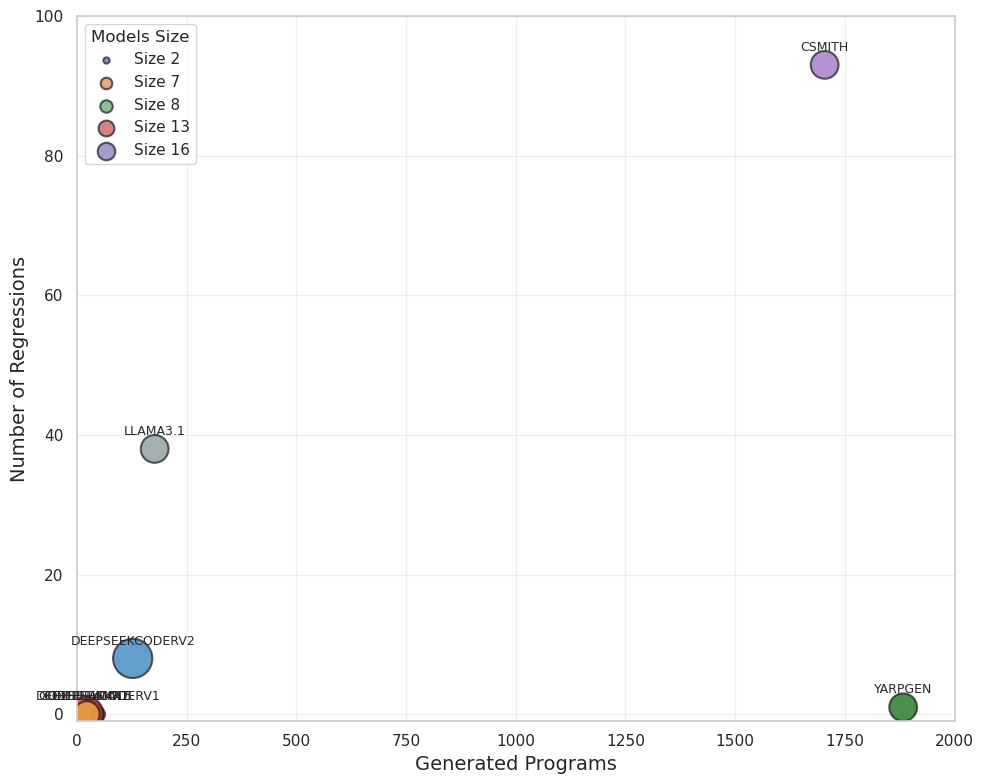

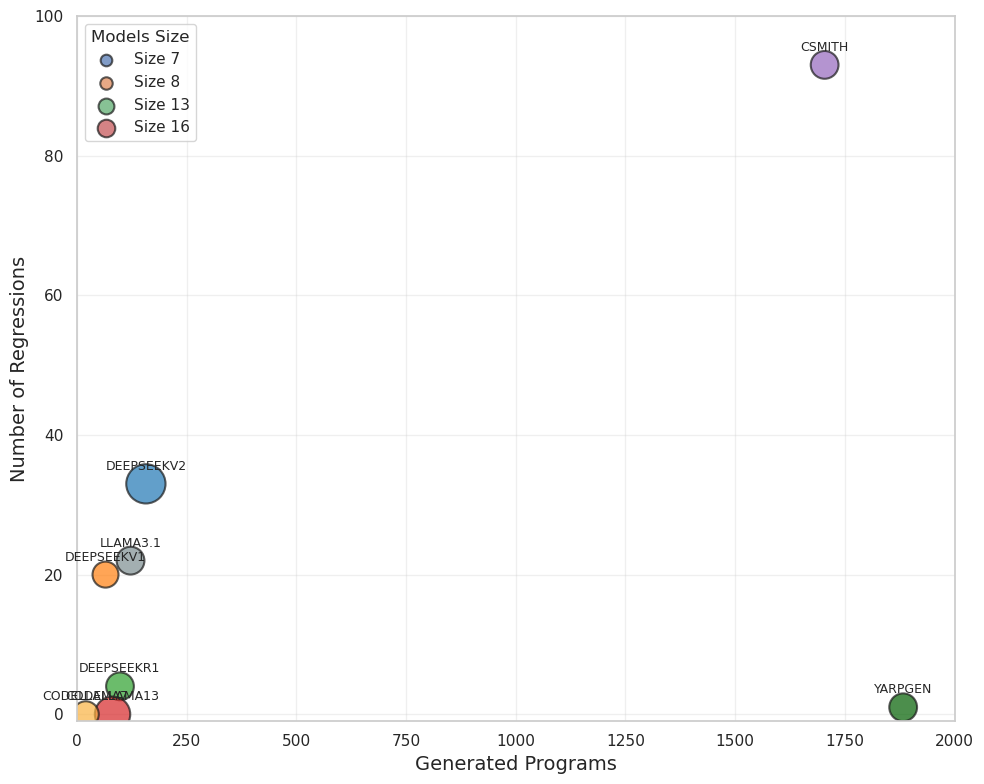

In [9]:
df_chain = pd.read_csv("../../data/TimeCodeExperiment/compiled_models_chain_view.csv")
df_single = pd.read_csv("../../data/TimeCodeExperiment/compiled_single_models_view.csv")

create_scatter_plot(df_chain)
create_scatter_plot(df_single)

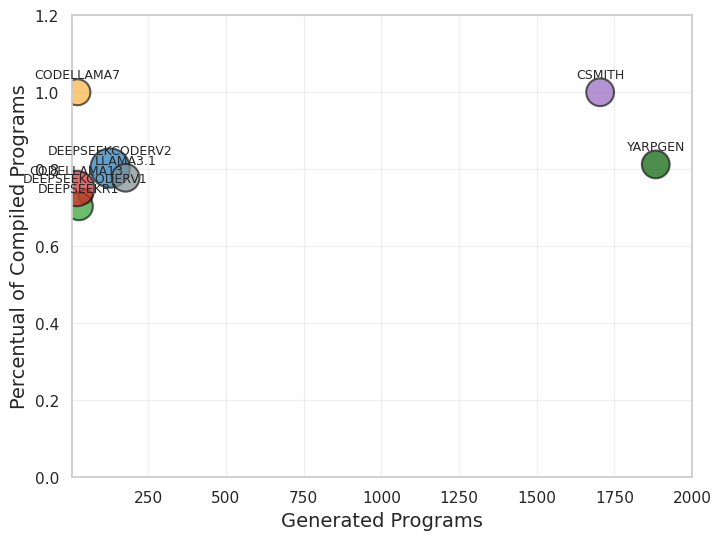

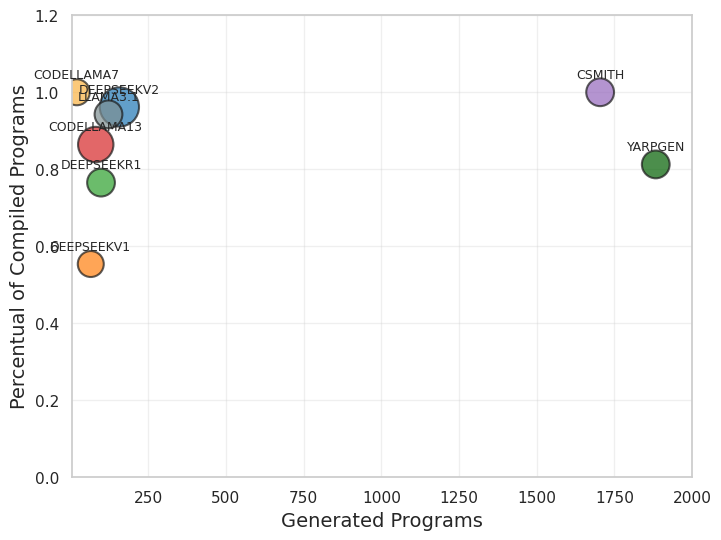

In [10]:
create_compilation_plot(df_chain)
create_compilation_plot(df_single)


ValueError: The palette dictionary is missing keys: {'CSMITH', 'YARPGEN'}

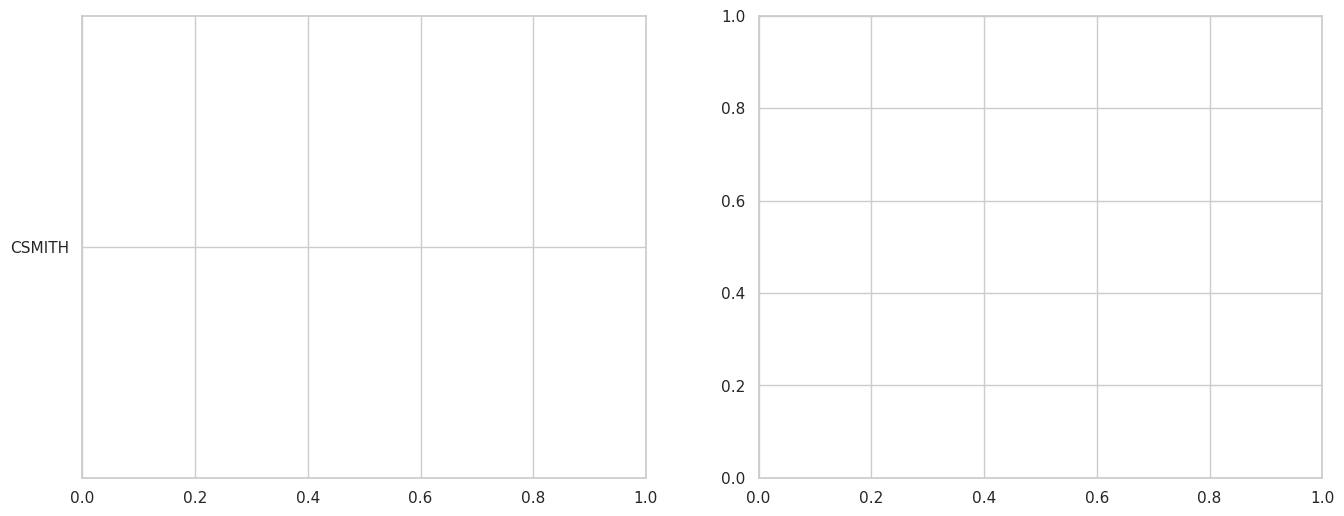

In [14]:

df = pd.read_csv("../../data/TimeCodeExperiment/time_til_regression.csv")
df_single_lt = df[df['type'] == 'single'].sort_values('regression', ascending=True)
df_chain_lt = df[df['type'] == 'chain'].sort_values('regression', ascending=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=100)

create_regression_plot(df_single_lt, ax1)

ax1.set_title('Single Models', fontsize=14)
if not df_single_lt.empty:
    ax1.set_xlim(0, df_single_lt['regression'].max() * 1.3)

create_regression_plot(df_chain_lt, ax2)

ax2.set_title('Chain Models', fontsize=14)
if not df_chain_lt.empty:
    ax2.set_xlim(0, df_chain_lt['regression'].max() * 1.3)

handles = [
    plt.Line2D([0], [0], color=palette['LLAMA3.1'], lw=6),
    plt.Line2D([0], [0], color=palette['DEEPSEEKCODERV1'], lw=6),
    plt.Line2D([0], [0], color=palette['DEEPSEEKCODERV2'], lw=6),
    plt.Line2D([0], [0], color=palette['DEEPSEEKR1'], lw=6),
    plt.Line2D([0], [0], color=palette['CSMITH'], lw=6),
    plt.Line2D([0], [0], color=palette['YARPGEN'], lw=6)
]

labels = ['LLAMA3.1', 'DEEPSEEKCODERV1', 'DEEPSEEKCODERV2', 'DEEPSEEKR1','CSMITH', 'YARPGEN']
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()